In [54]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import missingno as msno 
from scipy import stats


In [55]:
raw_data=pd.read_csv('train.csv')
raw_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

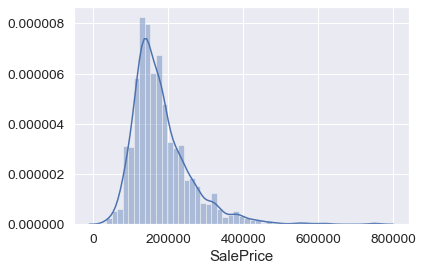

In [56]:
#Histogram
#Finding: right skew, there is peakness
sns.distplot(raw_data['SalePrice']);

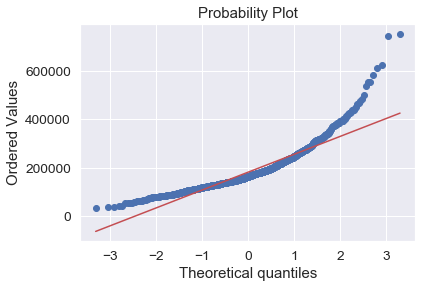

In [57]:
#Plot raw data normal probability plot
res = stats.probplot(raw_data['SalePrice'], plot=plt)

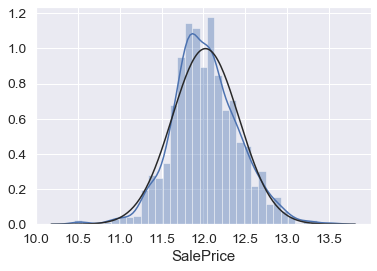

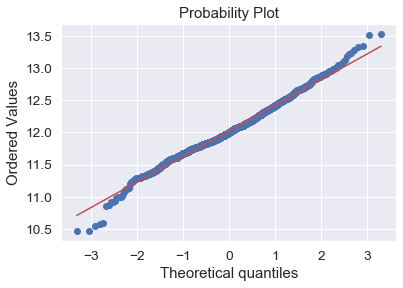

In [58]:
#applying log transformation
from scipy.stats import norm

raw_data['SalePrice'] = np.log(raw_data['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(raw_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(raw_data['SalePrice'], plot=plt)


In [59]:
raw_data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [60]:
#show skewness and kurtosis
print("Skewness: %f" % raw_data['SalePrice'].skew())
print("Kurtosis: %f" % raw_data['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


In [61]:
###NOTE: SET ID AS INDEX

import numpy as np
import pandas as pd

def data_process(df_raw,remove_outlier = False,remove_hard_to_fit = False,linear_model = False):
    
	# Make a copy so the original dataframe will not be altered.
    df_processed = df_raw.copy()

    #set index
    df_processed=df_processed.set_index('Id')
	# Take the logarithm of the observed sales price.
    df_processed.SalePrice = np.log(df_processed.SalePrice)
    
	# Remove outliers.
    df_processed = df_processed[df_processed.GrLivArea < 4000]

    ## Missing values
    
    # 259 LotFrontage  - replace missing value with 0 
    df_processed.LotFrontage = df_processed.LotFrontage.fillna(0)

    # 1369 Alley - replace with None
    df_processed.Alley = df_processed.Alley.fillna('None')

    # 8 MasVnrType and MasVnrArea - replace MasVnrType with None and MasVnrArea with 0
    df_processed.MasVnrType = df_processed.MasVnrType.fillna('None')
    df_processed.MasVnrArea = df_processed.MasVnrArea.fillna(0)

    # 37 basement: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2- replace with Nb
    df_processed.BsmtQual = df_processed.BsmtQual.fillna('Nb')
    df_processed.BsmtCond = df_processed.BsmtCond.fillna('Nb')
    df_processed.BsmtExposure = df_processed.BsmtExposure.fillna('Nb')
    df_processed.BsmtFinType1 = df_processed.BsmtFinType1.fillna('Nb')
    df_processed.BsmtFinType2 = df_processed.BsmtFinType2.fillna('Nb')

    # 690 FireplaceQu - replace with Nf
    df_processed.FireplaceQu = df_processed.FireplaceQu.fillna('Nf')

    # 81 Garage: GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - replace with Ng and year with 0 
    df_processed.GarageType = df_processed.GarageType.fillna('Ng')
    df_processed.GarageFinish = df_processed.GarageFinish.fillna('Ng')
    df_processed.GarageQual = df_processed.GarageQual.fillna('Ng')
    df_processed.GarageCond = df_processed.GarageCond.fillna('Ng')
    df_processed.GarageYrBlt = df_processed.GarageYrBlt.fillna(0)

    # 1453 PoolQC - replace with Np
    df_processed.PoolQC = df_processed.PoolQC.fillna('Np')

    # 1179 Fence - replace with Nf
    df_processed.Fence = df_processed.Fence.fillna('Nf')

    # 1406 MiscFeature - replace with None    
    df_processed.MiscFeature = df_processed.MiscFeature.fillna('None')

    # 1 Electrical
    df_processed = df_processed[pd.notnull(df_processed.Electrical)]

    ## Combine columns and drop direct multicollinear columns 
    
    # combine bathroom quanlitity 
    df_processed['BsmtBath'] = df_processed.BsmtFullBath + df_processed.BsmtHalfBath * 0.5
    df_processed['Bath'] = df_processed.FullBath + df_processed.HalfBath * 0.5
    df_processed = df_processed.drop(['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath'], axis=1)

    # drop TotalBsmtSF - multicollinearaty
    df_processed = df_processed.drop(['TotalBsmtSF'], axis=1)

    # drop GrLivArea - multicollinearaty
    df_processed = df_processed.drop(['GrLivArea'], axis=1)

    # drop GarageArea - results is better than drop GarageCars, why??
    df_processed = df_processed.drop(['GarageArea'], axis=1) 
    

	# Categorical Features Processsing

	# MSSubClass processing - MSSubClass 20-90 contains only duplicate information with HouseStyle and YearBuilt.
    df_processed['MSSubClass'] = df_processed['MSSubClass'].replace(['20','30','40','45','50','60','70','75','80','85'], '0')

    # Convert numerical to categorical. 
    df_processed[['MSSubClass','OverallQual','OverallCond']] = df_processed[['MSSubClass','OverallQual','OverallCond']].astype(str)

    #Get Dummies 
    df_processed = pd.get_dummies(df_processed, columns=df_processed.select_dtypes(include=['object']).columns, drop_first=True)

# #---Multiply features:
#     df_processed["add_OverallGrade"] = df_processed["OverallQual"] * df_processed["OverallCond"]
#     df_processed["add_GarageGrade"] = df_processed["GarageQual"] * df_processed["GarageCond"]
#     df_processed["add_ExterGrade"] = df_processed["ExterQual"] * df_processed["ExterCond"]
#     df_processed["add_KitchenScore"] = df_processed["KitchenAbvGr"] * df_processed["KitchenQual"]
#     df_processed["add_FireplaceScore"] = df_processed["Fireplaces"] * df_processed["FireplaceQu"]
#     df_processed["add_GarageScore"] = df_processed["GarageArea"] * df_processed["GarageQual"]
#     df_processed["add_PoolScore"] = df_processed["PoolArea"] * df_processed["PoolQC"]
#     df_processed['add_GrLivArea*OvQual'] = df_processed['GrLivArea'] * df_processed['OverallQual']
#     df_processed['add_QualOverall*Exter*Kitch*Bsmt*Garage'] = df_processed['OverallQual'] * df_processed['ExterQual'] * df_processed['KitchenQual'] * df_processed['BsmtQual'] * df_processed['GarageQual']



    return df_processed

In [62]:
cleaned_data=data_process(raw_data)
cleaned_data.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                                                                          
1          65.0     8450       2003          2003       196.0         706   
2          80.0     9600       1976          1976         0.0         978   
3          68.0    11250       2001          2002       162.0         486   
4          60.0     9550       1915          1970         0.0         216   
5          84.0    14260       2000          2000       350.0         655   

    BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
Id                                             ...                   
1            0        150       856       854  ...               0   
2            0        284      1262         0  ...               0   
3            0        434       920       866  ...               0   
4            0        540       961       756  ...               0   
5            0        490      1145      1053  ...               0   

    SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                            
1                0             0             0            1   
2                0             0             0            1   
3                0             0             0            1   
4                0             0             0            1   
5                0             0             0            1   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                      
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
5                       0                     0                     0   

    SaleCondition_Normal  SaleCondition_Partial  
Id                                               
1                      1                      0  
2                      1                      0  
3                      1                      0  
4                      0                      0  
5                      1                      0  

[5 rows x 282 columns]

In [63]:
column_names=cleaned_data.columns.to_list()
column_names

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'BsmtBath',
 'Bath',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'La

### multicolinearity 


Text(0.5, 1.0, '$R^2$ of a all features against the other features')

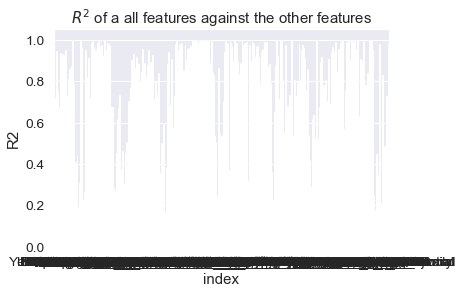

In [64]:
#Using the cleaned data. Visualize R2 of a feature against all other features
from sklearn.linear_model import LinearRegression 
#ols = linear_model.LinearRegression

#Detect multicollinearity among features
scores = {}

ols1 = LinearRegression()



from sklearn.metrics import r2_score
for feature_name in column_names:
                df2     = cleaned_data.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols1.fit(df2, feature)
                scores[feature_name] = ols1.score(df2, feature)   

sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a all features against the other features')
#R2 is the goodness of fit. Here, the bigger the R2, 
#it means the variable is highly correlated with other variables.

In [65]:
#Need to confirm
numerical_columns=['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

len(numerical_columns)

33

In [66]:
category_columns=['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

len(category_columns)

47

Feature not evaluated: TotalBsmtSF
Feature not evaluated: GrLivArea
Feature not evaluated: BsmtFullBath
Feature not evaluated: BsmtHalfBath
Feature not evaluated: FullBath
Feature not evaluated: HalfBath
Feature not evaluated: GarageArea


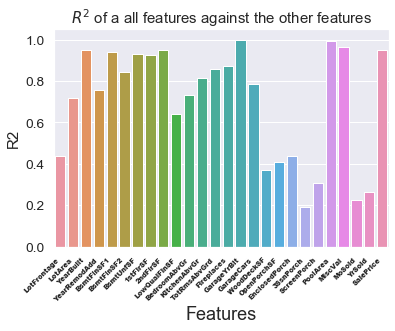

In [67]:
#Used cleaned data
# For all numeric columns, visualize R2 of a feature against all other features
from sklearn.linear_model import LinearRegression 
#ols = linear_model.LinearRegression

#Detect multicollinearity among features
scores = {}

ols2 = LinearRegression()

from sklearn.metrics import r2_score

for feature_name in numerical_columns:
        try:
            df2     = cleaned_data.copy()
            feature = df2[feature_name].copy()
            df2.drop(feature_name, axis=1, inplace=True)
            ols2.fit(df2, feature)
            scores[feature_name] = ols2.score(df2, feature)   

            chart=sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
            plt.title('$R^2$ of a all features against the other features')
            #R2 is the goodness of fit. Here, the bigger the R2, 
            #it means the variable is highly correlated with other variables.


            chart.set_xticklabels(
            chart.get_xticklabels(), 
            rotation=45, 
            horizontalalignment='right',
            fontweight='heavy',
            fontsize='x-small')

            plt.xlabel('Features', fontsize=18)
    
        except:
            print ('Feature not evaluated:', feature_name)
    

###  numerical variables vs target variables --scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

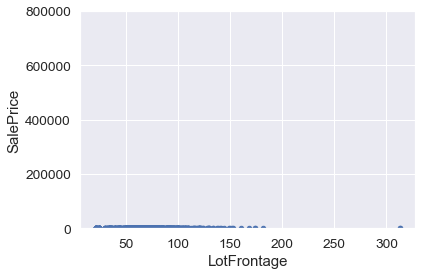

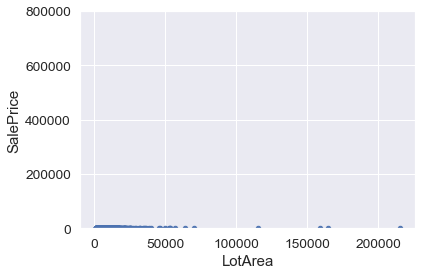

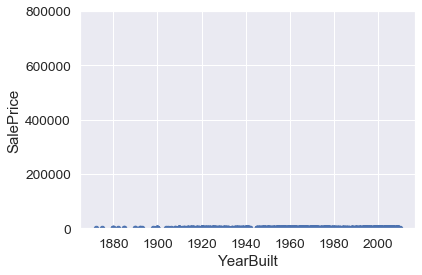

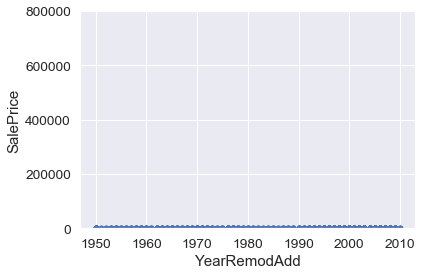

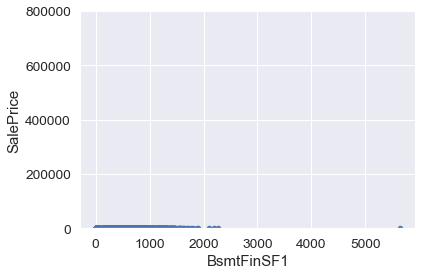

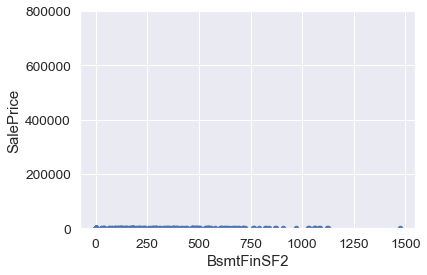

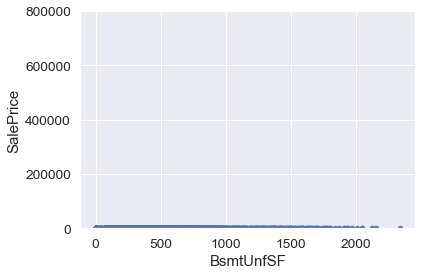

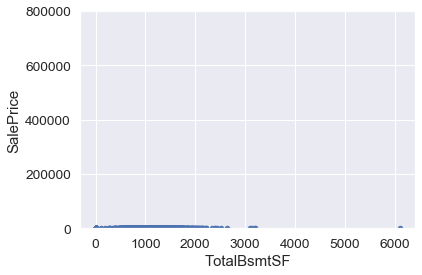

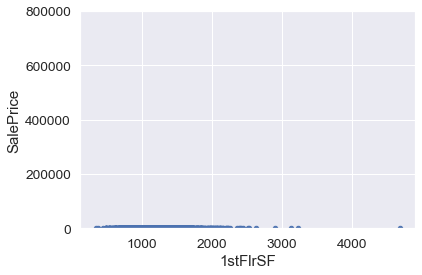

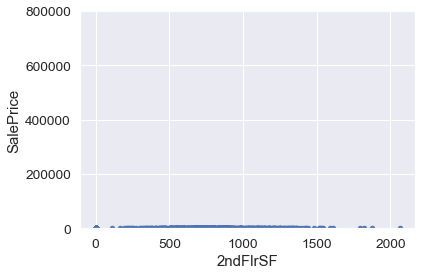

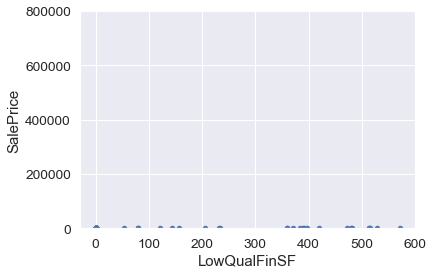

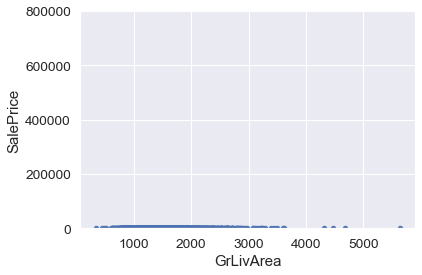

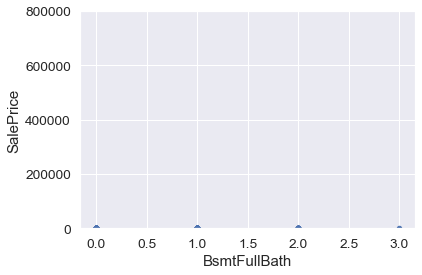

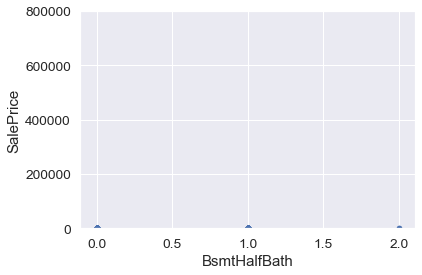

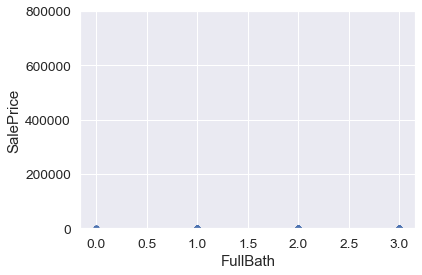

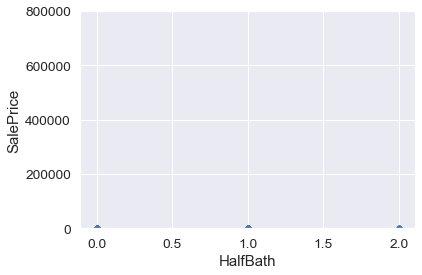

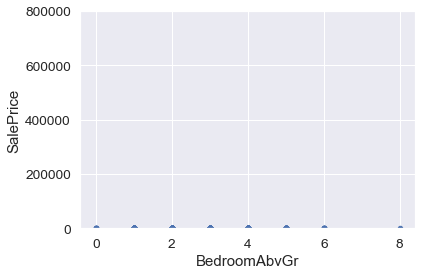

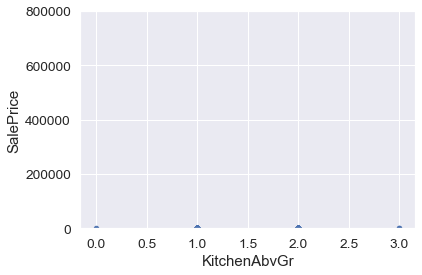

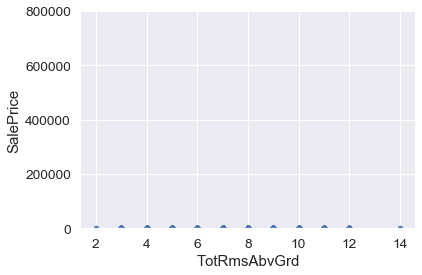

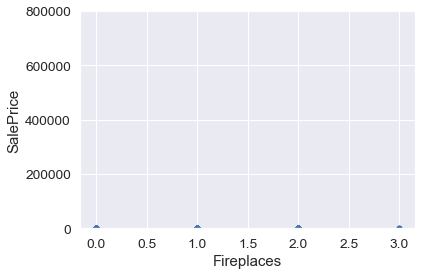

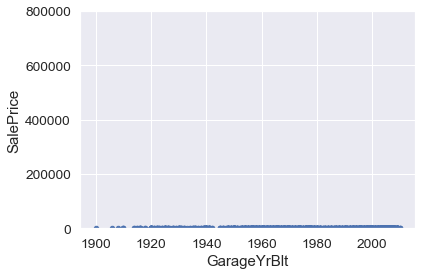

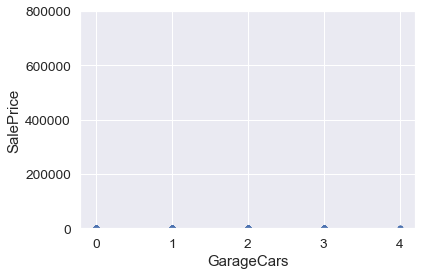

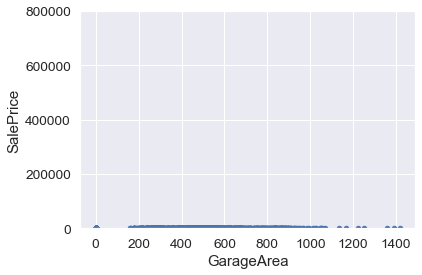

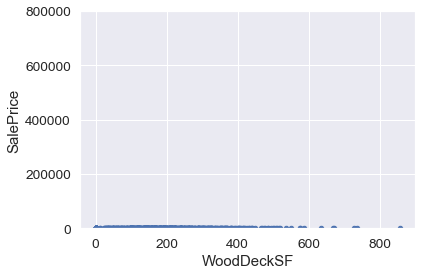

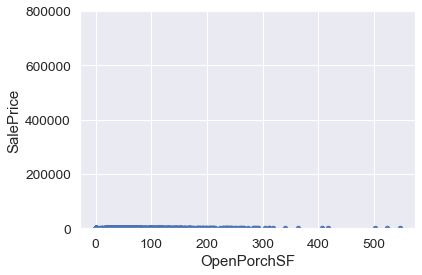

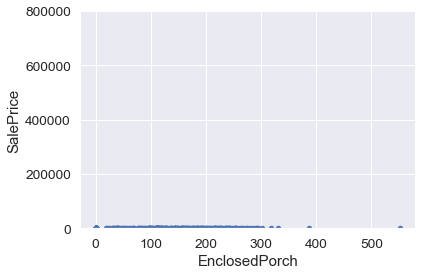

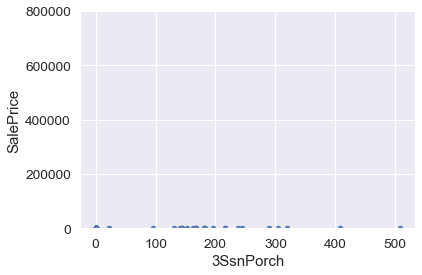

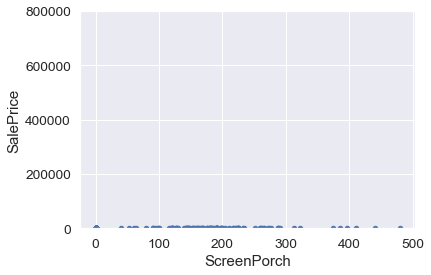

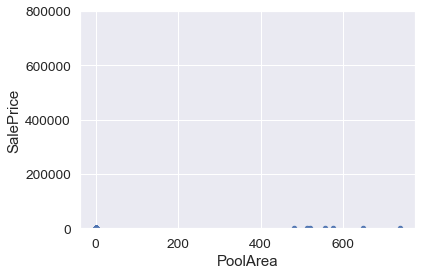

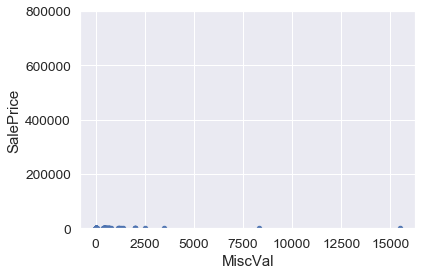

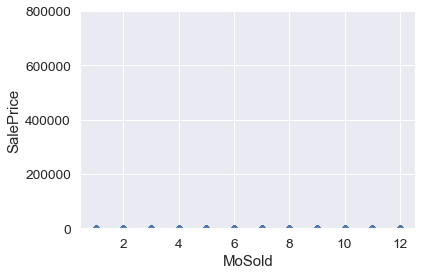

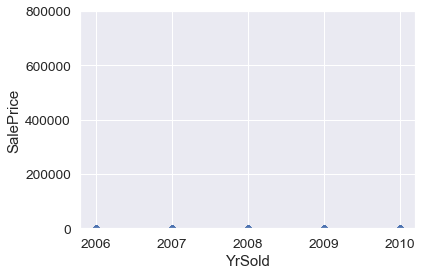

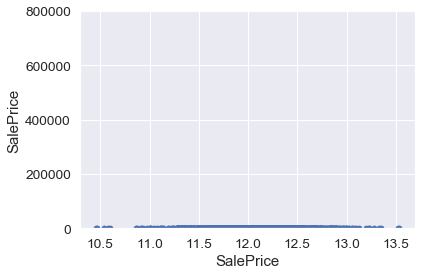

In [68]:
#with raw data
#scatter plot all numerical/saleprice

for column in numerical_columns:
    try:
        scatter_df = pd.concat([raw_data['SalePrice'], raw_data[column]], axis=1)
        scatter_df.plot.scatter(x=column, y='SalePrice', ylim=(0,800000));
        
    except:
        print ('column is not graphed:', column)

### categorical variables vs target variables --boxplots

In [ ]:
raw_data.dtypes.unique()

C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figu

C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figu

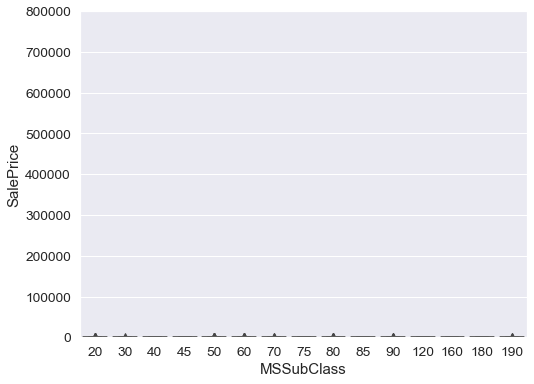

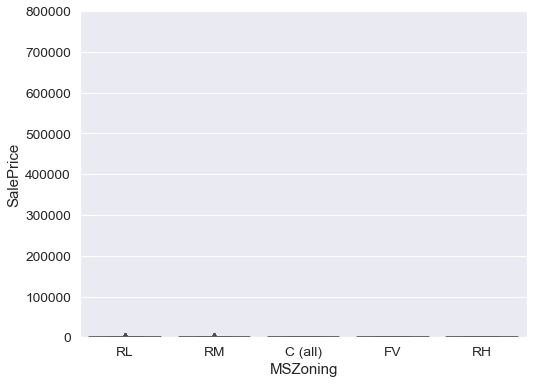

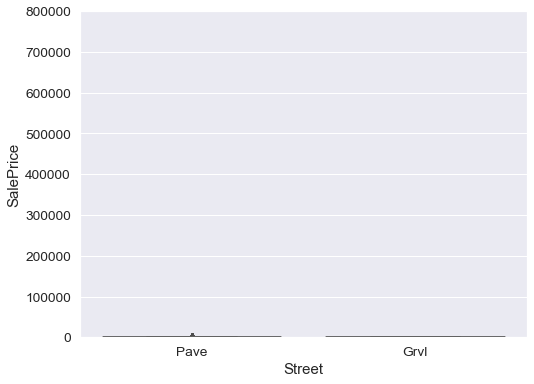

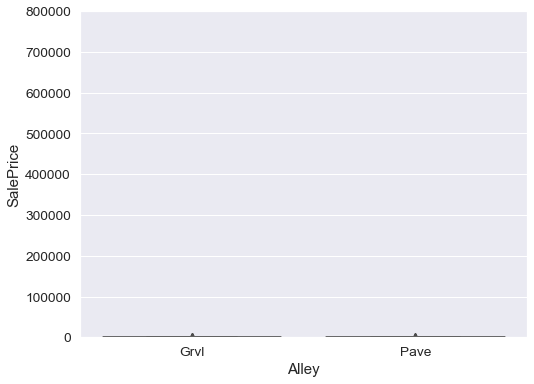

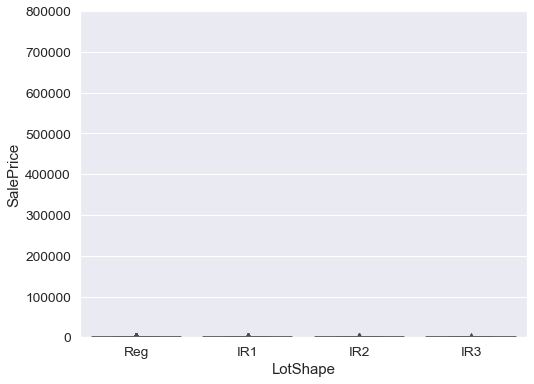

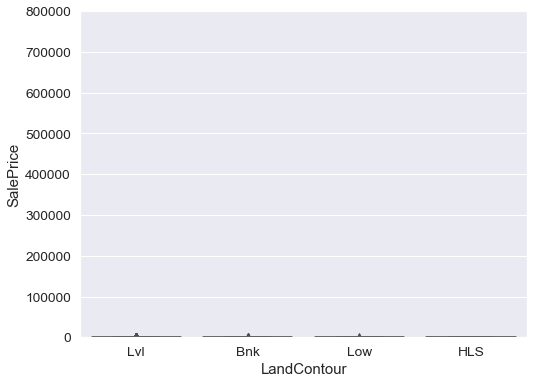

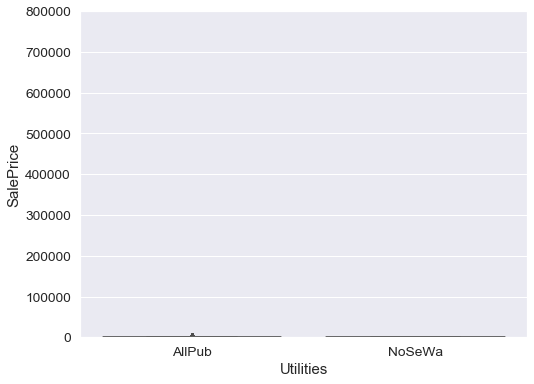

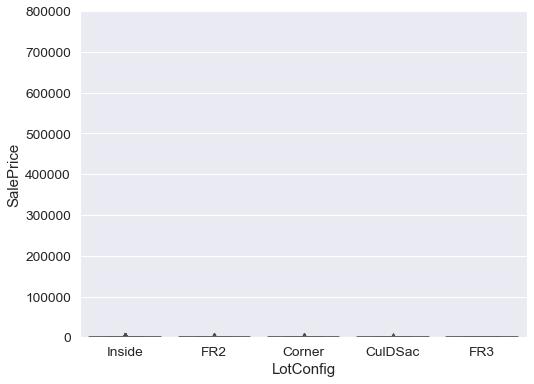

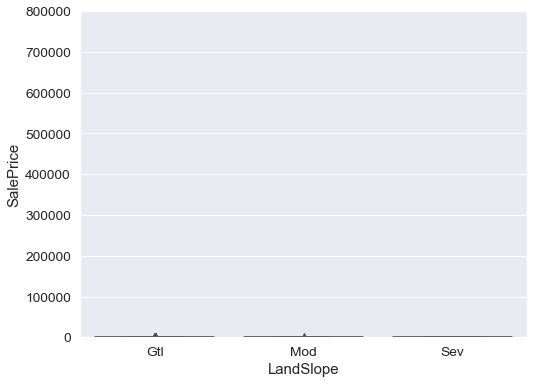

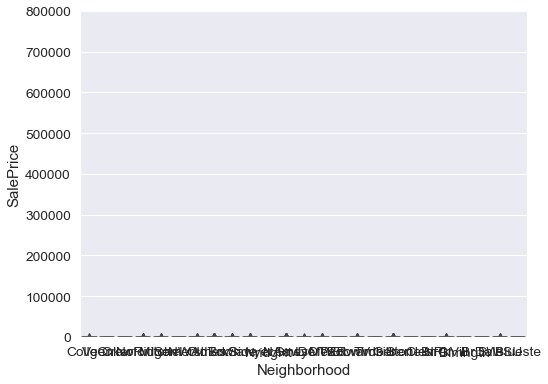

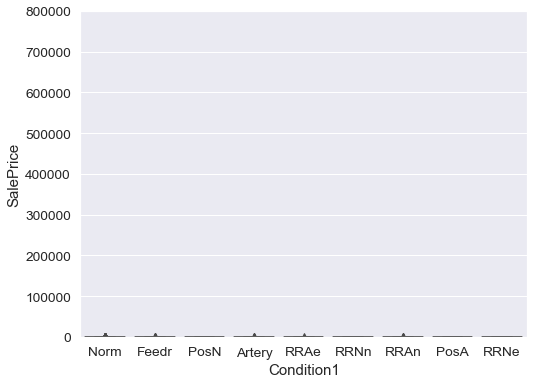

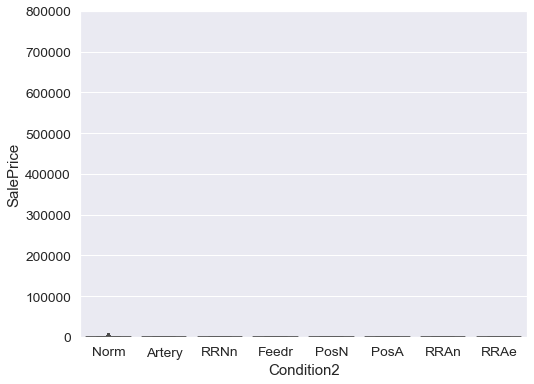

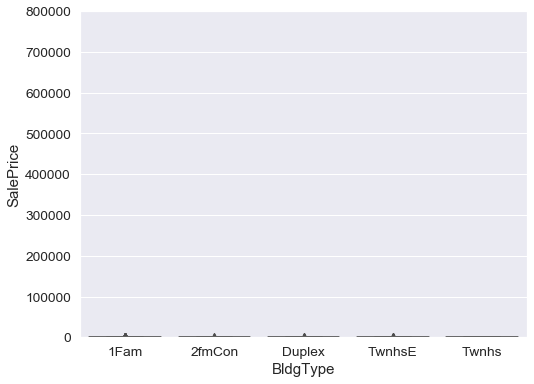

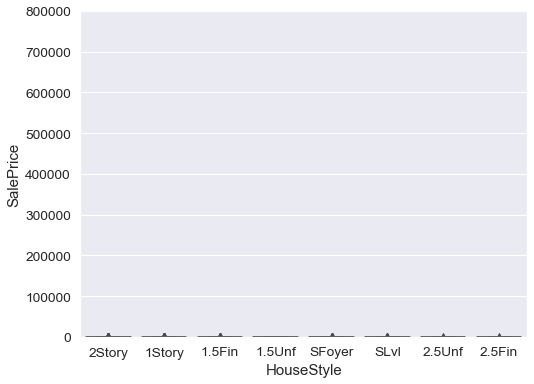

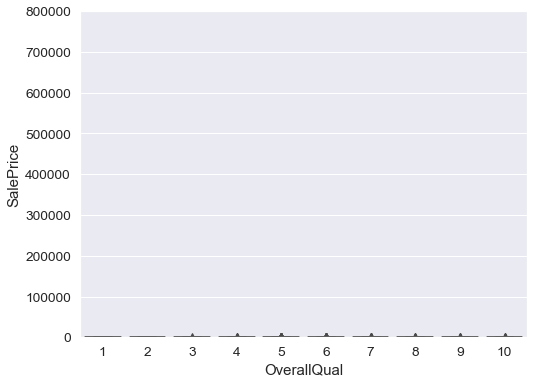

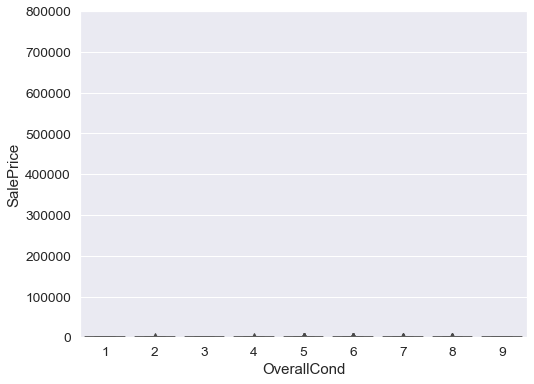

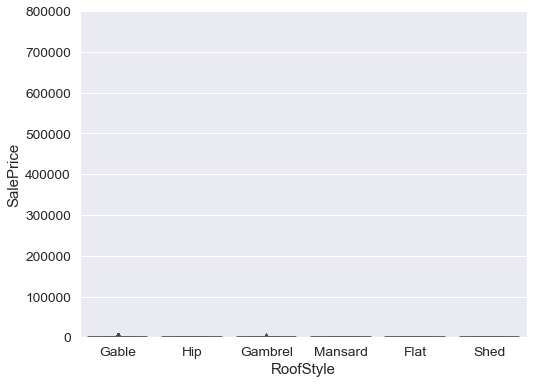

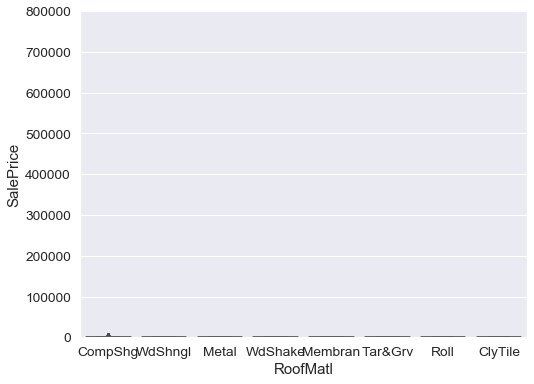

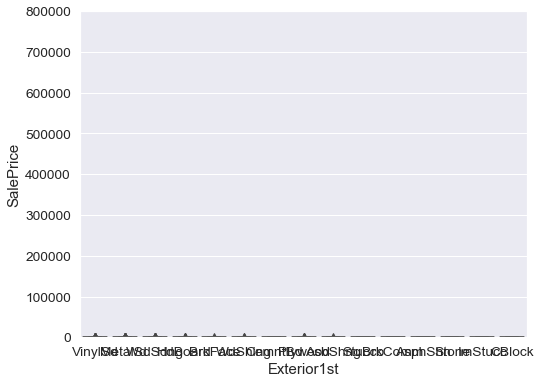

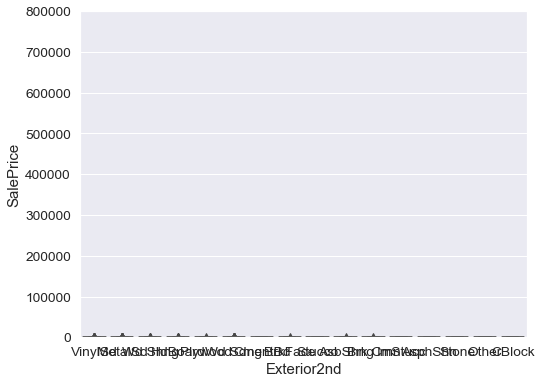

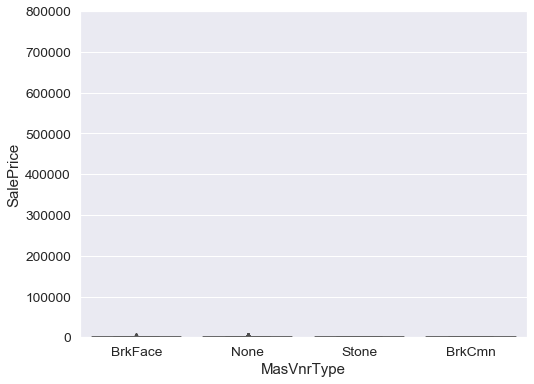

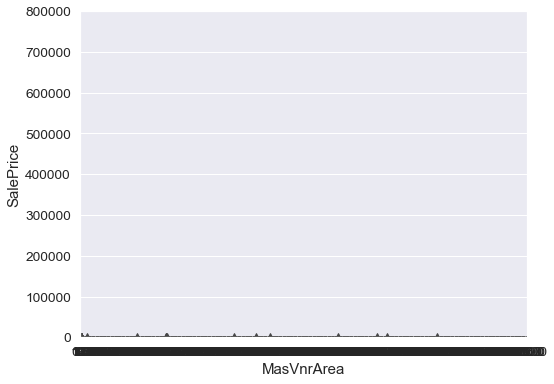

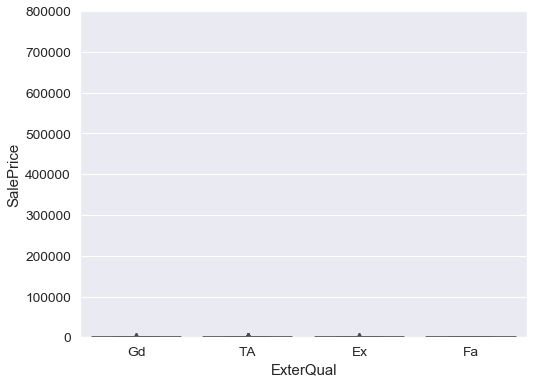

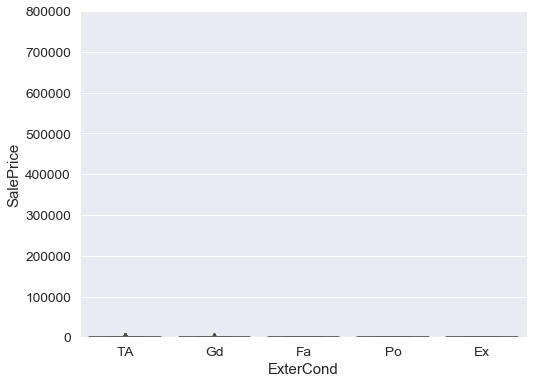

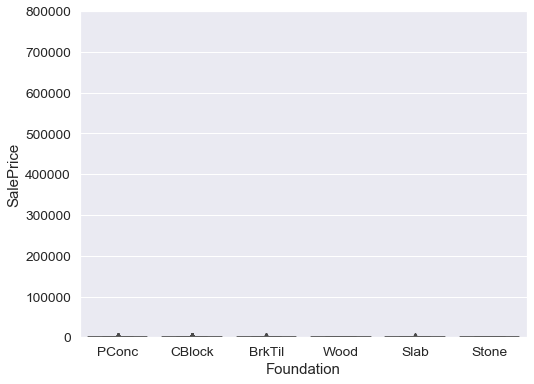

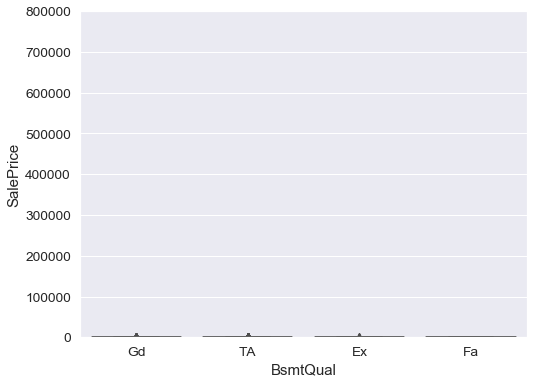

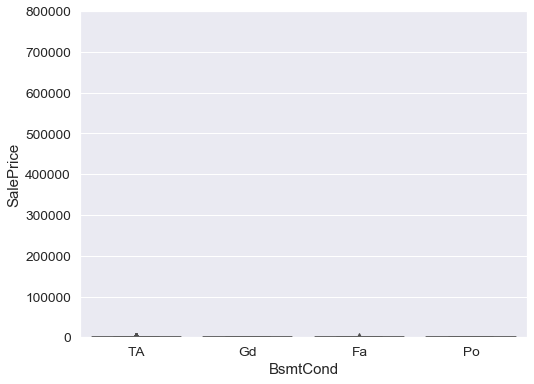

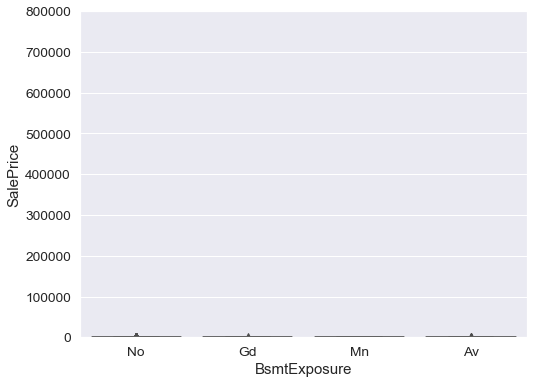

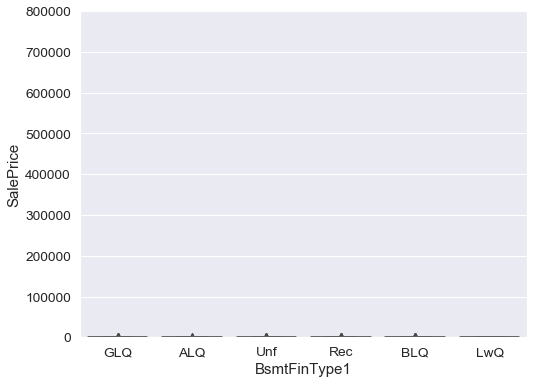

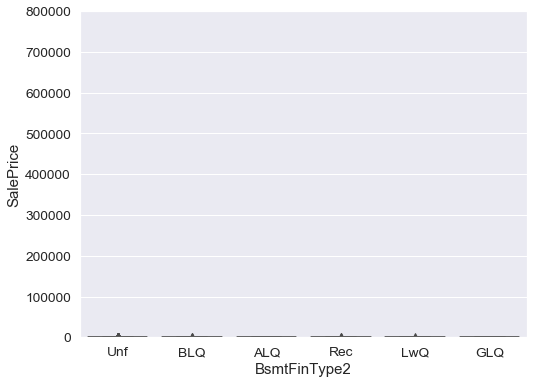

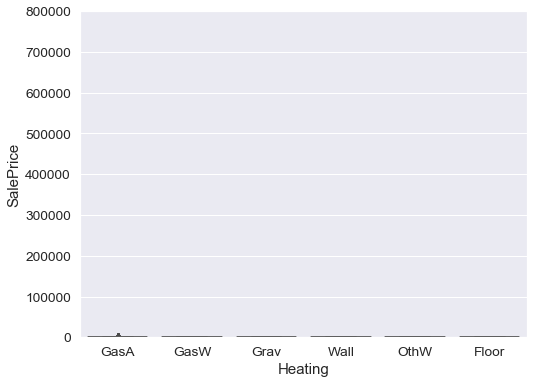

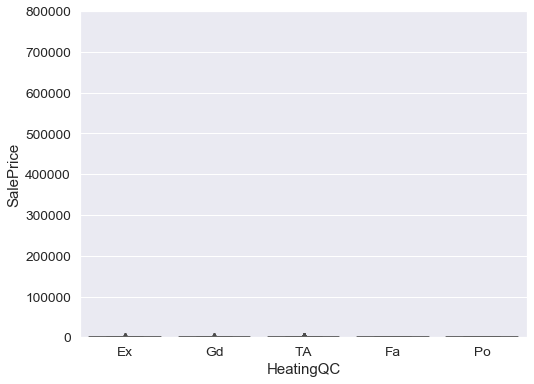

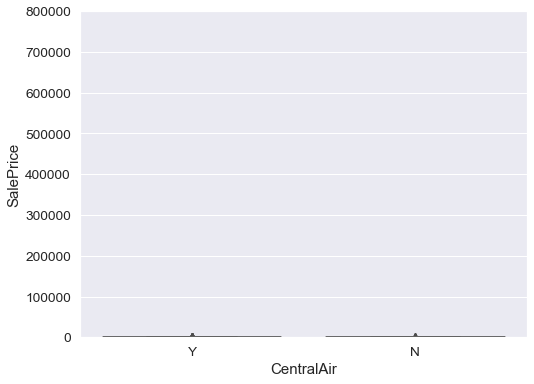

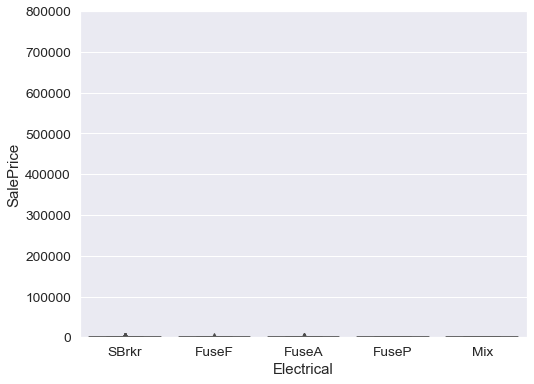

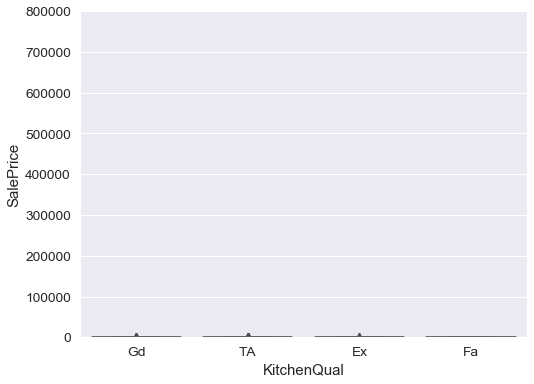

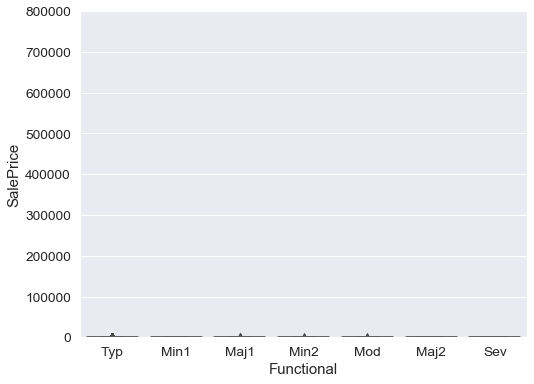

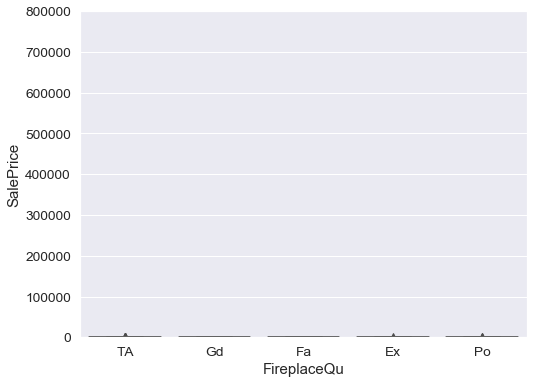

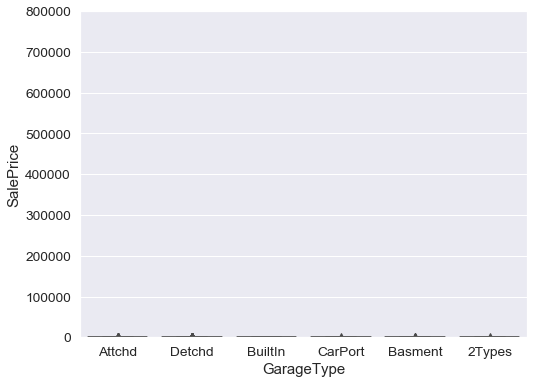

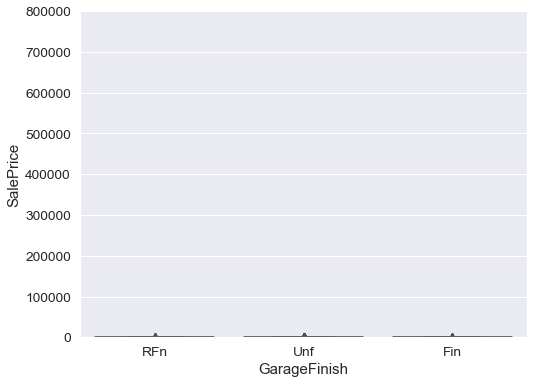

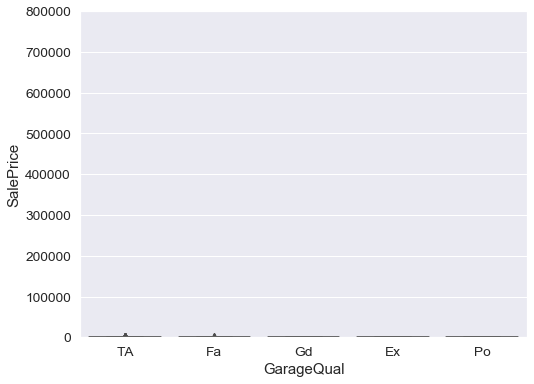

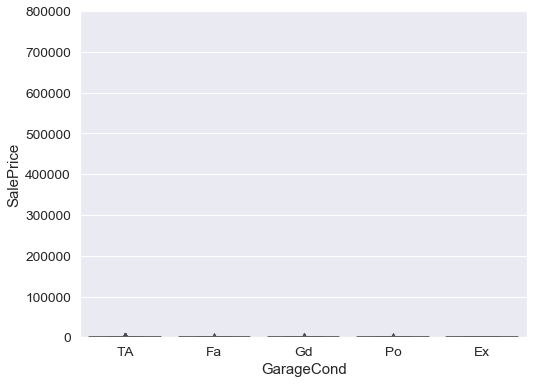

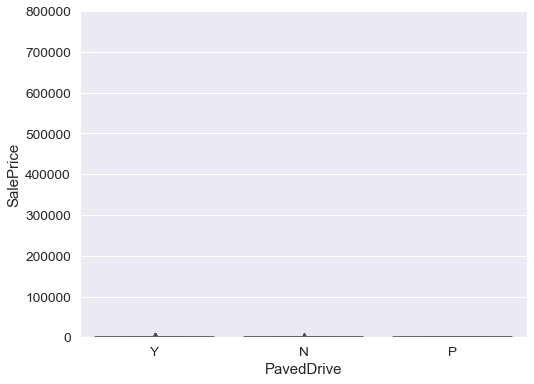

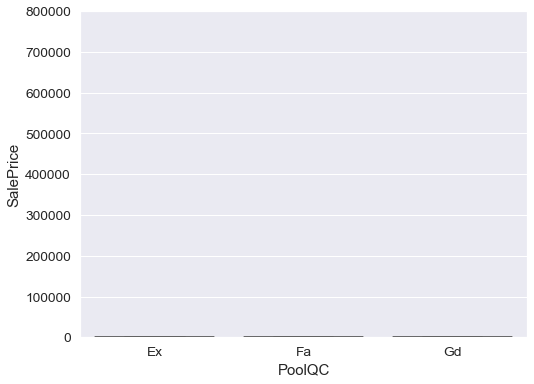

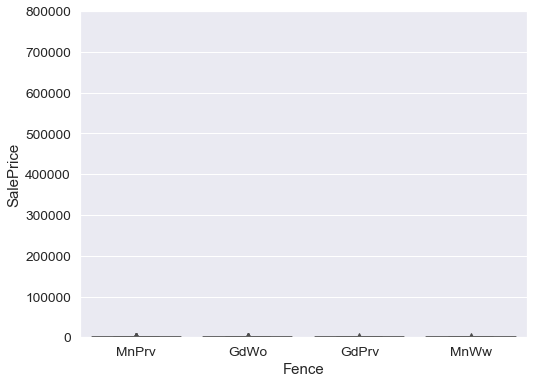

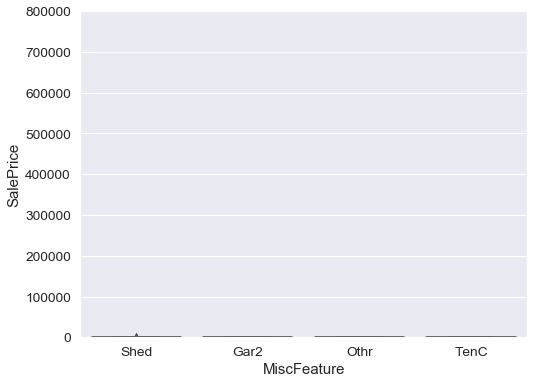

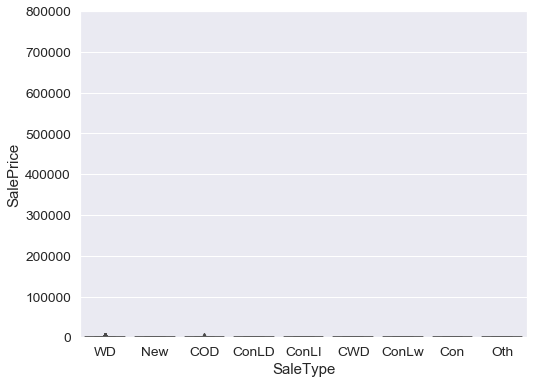

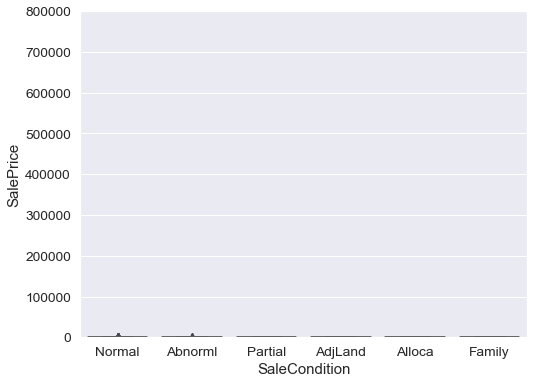

In [71]:
#box plot category data to saleprice
#with raw data

for column in category_columns:
    boxplot_df = pd.concat([raw_data['SalePrice'], raw_data[column]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=column, y="SalePrice", data=raw_data)
    fig.axis(ymin=0, ymax=800000);

### Correlation between variables --heatmaps

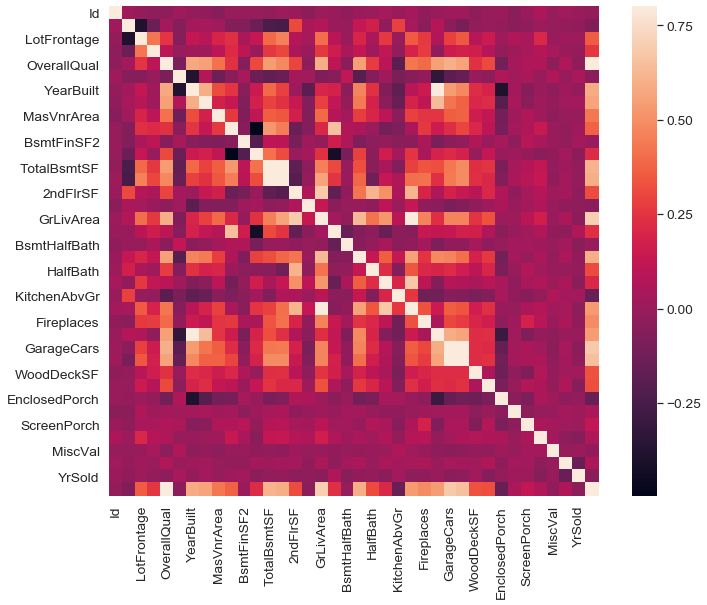

In [72]:
#heatmap
#correlation matrix
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


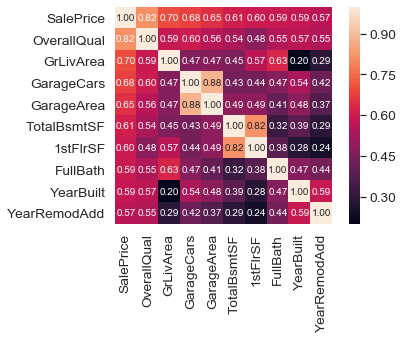

In [73]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(raw_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Visualize missing values


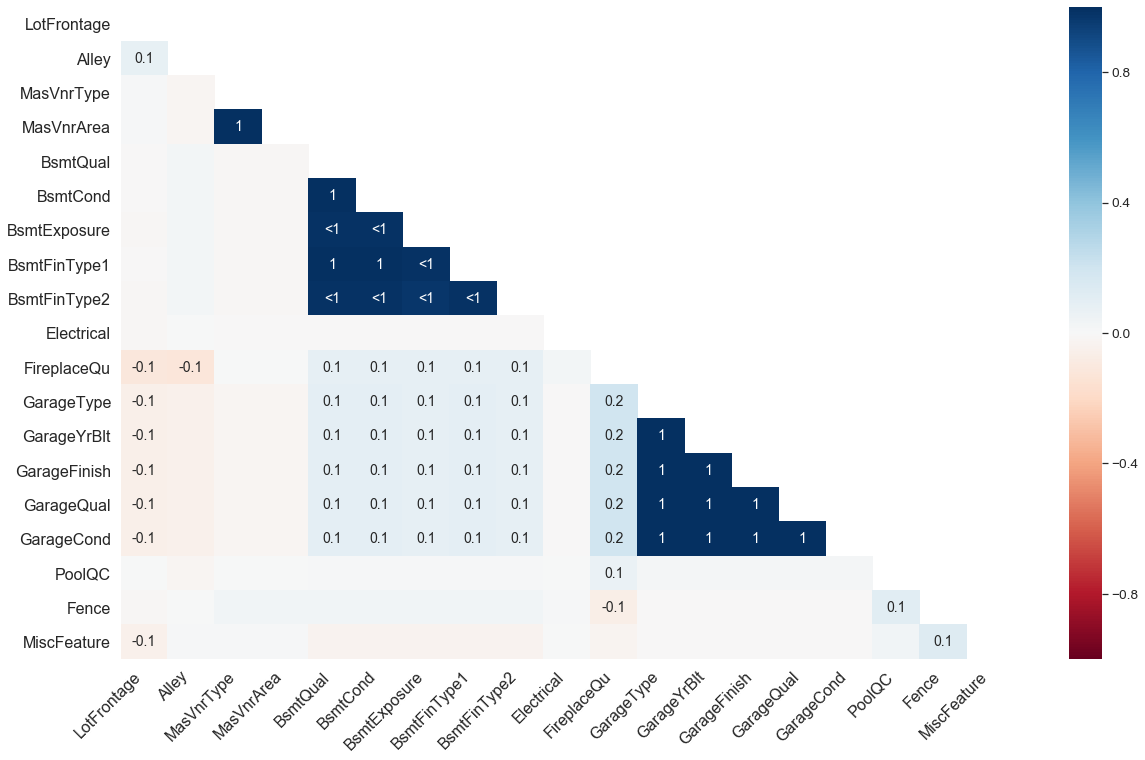

In [74]:
#The missingno correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another:
msno.heatmap(raw_data)


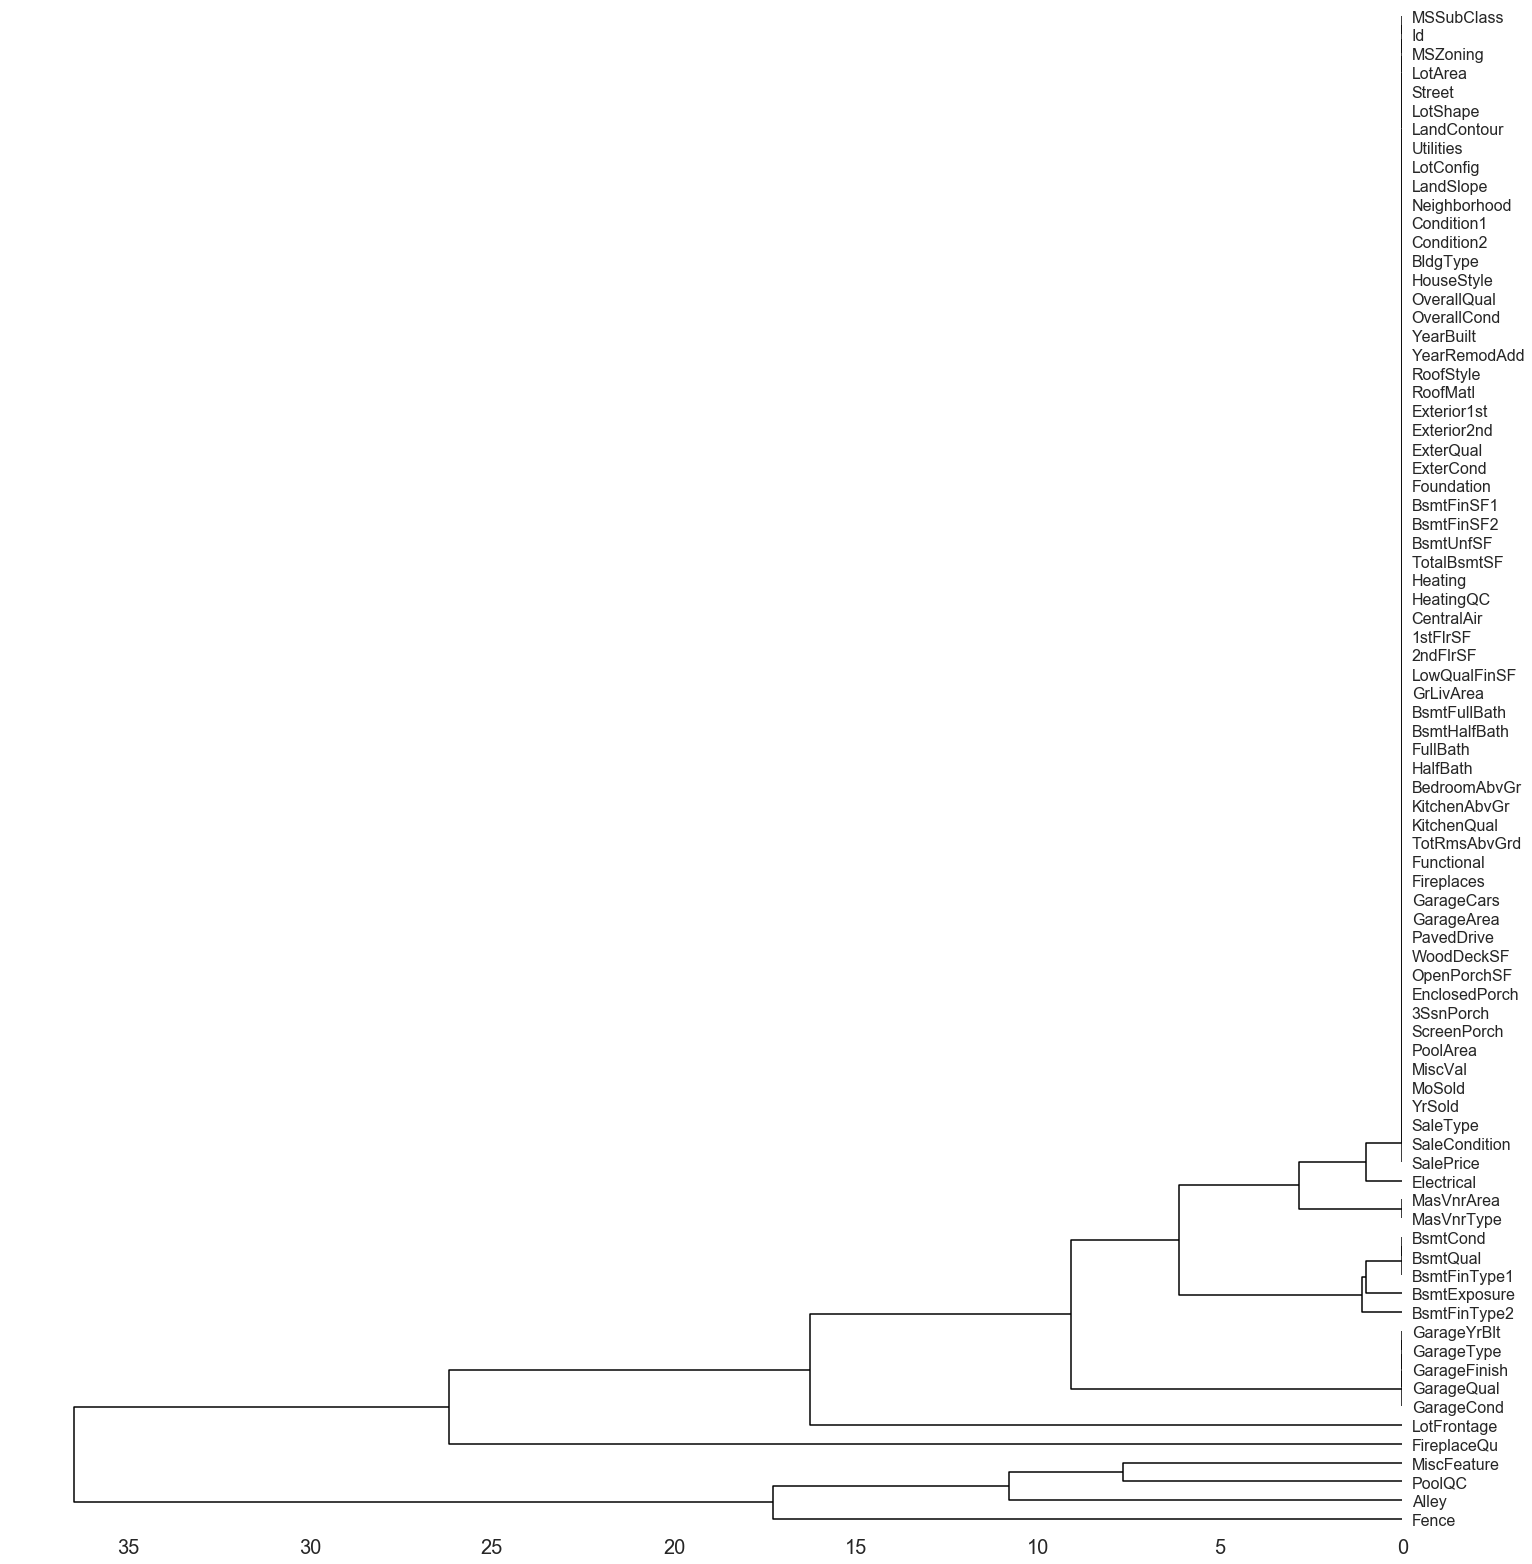

In [75]:
 msno.dendrogram(raw_data)